<a href="https://colab.research.google.com/github/kai054631/Weather_Data/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
from pandas import read_csv
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score,train_test_split as split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Read dataset from github and show frist 5 rows

In [303]:
df = read_csv("https://raw.githubusercontent.com/Des282/Dataset/refs/heads/main/seattle-weather.csv")#store and read
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


check if any data is missing

In [304]:
df.isna().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


show the size of dataset

In [305]:
df.shape

(1461, 6)

In [306]:
df = df.drop(columns = ["date"])
X = df.drop(columns=["weather"])
y = df["weather"]

In [307]:
X.shape

(1461, 4)

Train and evaluate at least five different machine learning algorithms, such as:

• Linear Regression/Logistic Regression    
• Decision Trees     
• Random Forest    
• Support Vector Machines (SVM)    
• k-Nearest Neighbors (kNN)    
• Gradient Boosting Trees   
• Neural Networks   

In [308]:
#Use spot-checking to quickly evaluate the performance of 8 machine learning algorithms
models = {}
models['lgr'] = LGR() #r2 score
models['knn'] = KNN() #accuracy
models['dtc'] = DTC() #accuracy
models['rfc'] = RFC() #accuracy
models['gbc'] = GBC() #accuracy
models['gnb'] = GNB() #accuracy
models['svc'] = SVC() #accuracy

#before hyperparameter tuning
kf = KFold(n_splits=3,shuffle=True,random_state=42) #set default n_splits = 3
for n in models:
  score=cross_val_score(models[n], X, y, cv=kf, n_jobs=-1)
  print(f'{n}:{score.mean():.3%},  {score.std():.3%}')

lgr:84.326%,  0.968%
knn:75.838%,  1.078%
dtc:75.702%,  1.178%
rfc:82.820%,  1.178%
gbc:82.272%,  0.923%
gnb:84.326%,  1.355%
svc:77.481%,  1.078%


In [314]:
Robust_scl = RobustScaler()#Feature Scaling with RobustScaler
Xs1 = Robust_scl.fit_transform(X)

MinMax_scl = MinMaxScaler()#Feature Scaling with MinMaxScaler
Xs2 = MinMax_scl.fit_transform(X)

Standard_scl = StandardScaler()#Feature Scaling with StandardScaler
Xs3 = Standard_scl.fit_transform(X)

In [315]:
print(f"Feature Scaling with")
for n in models:
    scores = cross_val_score(models[n], Xs1, y, cv=kf, n_jobs=-1) #get the accuracy
    print(f"ROBUST SCALING {n}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy
print(" ")
for i in models:
    scores = cross_val_score(models[i], Xs2, y, cv=kf, n_jobs=-1) #get the accuracy
    print(f"MINMAX SCALING {i}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy
print(" ")
for j in models:
    scores = cross_val_score(models[j], Xs3, y, cv=kf, n_jobs=-1) #get the accuracy
    print(f"STANDARD SCALING {j}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy


Feature Scaling with
ROBUST SCALING lgr: 81.588%, 0.512%
ROBUST SCALING knn: 77.892%, 0.512%
ROBUST SCALING dtc: 75.770%, 1.099%
ROBUST SCALING rfc: 82.546%, 0.887%
ROBUST SCALING gbc: 82.341%, 0.887%
ROBUST SCALING gnb: 84.326%, 1.355%
ROBUST SCALING svc: 78.371%, 1.116%
 
MINMAX SCALING lgr: 73.238%, 0.860%
MINMAX SCALING knn: 70.363%, 0.635%
MINMAX SCALING dtc: 75.702%, 1.365%
MINMAX SCALING rfc: 82.957%, 1.020%
MINMAX SCALING gbc: 82.341%, 1.047%
MINMAX SCALING gnb: 84.326%, 1.355%
MINMAX SCALING svc: 75.565%, 0.290%
 
STANDARD SCALING lgr: 78.166%, 0.678%
STANDARD SCALING knn: 71.458%, 1.099%
STANDARD SCALING dtc: 75.154%, 1.934%
STANDARD SCALING rfc: 83.436%, 1.011%
STANDARD SCALING gbc: 82.478%, 0.982%
STANDARD SCALING gnb: 84.326%, 1.355%
STANDARD SCALING svc: 77.550%, 0.792%


In [318]:
#Trying on Data Reduction: #4/2 = 2 reducing the feature by half
pca = PCA(n_components=2)
Xsr1 = pca.fit_transform(Xs1)
Xsr2 = pca.fit_transform(Xs2)
Xsr3 = pca.fit_transform(Xs3)

In [316]:
for n in models:
    scores = cross_val_score(models[n], Xsr1, y, cv=kf, n_jobs=-1) #get the accuracy
    print(f"ROBUST SCALING {n}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy
print(" ")
for i in models:
    scores = cross_val_score(models[i], Xsr2, y, cv=kf, n_jobs=-1) #get the accuracy
    print(f"MINMAX SCALING {i}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy
print(" ")
for j in models:
    scores = cross_val_score(models[j], Xsr3, y, cv=kf, n_jobs=-1) #get the accuracy
    print(f"STANDARD SCALING {j}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy

ROBUST SCALING lgr: 78.850%, 0.290%
ROBUST SCALING knn: 77.139%, 0.512%
ROBUST SCALING dtc: 70.363%, 1.943%
ROBUST SCALING rfc: 77.276%, 1.024%
ROBUST SCALING gbc: 78.439%, 0.168%
ROBUST SCALING gnb: 78.029%, 0.605%
ROBUST SCALING svc: 78.508%, 0.539%
 
MINMAX SCALING lgr: 62.423%, 2.012%
MINMAX SCALING knn: 59.343%, 1.266%
MINMAX SCALING dtc: 56.194%, 2.083%
MINMAX SCALING rfc: 61.670%, 1.869%
MINMAX SCALING gbc: 63.039%, 0.605%
MINMAX SCALING gnb: 61.875%, 1.943%
MINMAX SCALING svc: 65.024%, 1.116%
 
STANDARD SCALING lgr: 65.092%, 1.432%
STANDARD SCALING knn: 63.587%, 1.884%
STANDARD SCALING dtc: 56.879%, 2.347%
STANDARD SCALING rfc: 64.066%, 0.581%
STANDARD SCALING gbc: 65.435%, 1.406%
STANDARD SCALING gnb: 62.423%, 1.006%
STANDARD SCALING svc: 66.598%, 0.953%


In [317]:
#Feature Addition method: create new features based on the existing features
win_size = 3
df['mean_precipitation'] = df['precipitation'].rolling(win_size).mean()
df['mean_temp'] = df['temp_max'] + df['temp_min'] / 2
df['mean_wind'] = df['wind'].rolling(win_size).mean()
print(df.shape)
df.head()

(1461, 8)


,precipitation,temp_max,temp_min,wind,weather,mean_precipitation,mean_temp,mean_wind
0,0.0,12.8,5.0,4.7,drizzle,NaN,15.3,NaN
1,10.9,10.6,2.8,4.5,rain,NaN,12.0,NaN
2,0.8,11.7,7.2,2.3,rain,3.900000,15.3,3.833333
3,20.3,12.2,5.6,4.7,rain,10.666667,15.0,3.833333
4,1.3,8.9,2.8,6.1,rain,7.466667,10.3,4.366667


In [319]:
df.isna().sum()

,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0
mean_precipitation,2
mean_temp,0
mean_wind,2


In [320]:
df = df.dropna() # the dropna() method that can be used to drop the missing data
df.head()

,precipitation,temp_max,temp_min,wind,weather,mean_precipitation,mean_temp,mean_wind
2,0.8,11.7,7.2,2.3,rain,3.900000,15.3,3.833333
3,20.3,12.2,5.6,4.7,rain,10.666667,15.0,3.833333
4,1.3,8.9,2.8,6.1,rain,7.466667,10.3,4.366667
5,2.5,4.4,2.2,2.2,rain,8.033333,5.5,4.333333
6,0.0,7.2,2.8,2.3,rain,1.266667,8.6,3.533333


In [321]:
X_New = df.drop(columns=["weather"])
y_New = df["weather"]

Xs1 = Robust_scl.fit_transform(X_New)
Xs2 = MinMax_scl.fit_transform(X_New)
Xs3 = Standard_scl.fit_transform(X_New)

In [322]:
print(X_New.shape)
print(y_New.shape)

(1459, 7)
(1459,)


In [323]:
print(f"create new features based on the existing features")

for n in models:
    scores = cross_val_score(models[n], Xs1, y_New, cv=kf, n_jobs=-1) #get the accuracy
    print(f"ROBUST SCALING {n}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy
print(" ")
for i in models:
    scores = cross_val_score(models[i], Xs2, y_New, cv=kf, n_jobs=-1) #get the accuracy
    print(f"MINMAX SCALING {i}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy
print(" ")
for j in models:
    scores = cross_val_score(models[j], Xs3, y_New, cv=kf, n_jobs=-1) #get the accuracy
    print(f"STANDARD SCALING {j}: {scores.mean():.3%}, {scores.std():.3%}")#get the mean and standard deviation of accuracy

create new features based on the existing features
ROBUST SCALING lgr: 81.082%, 1.191%
ROBUST SCALING knn: 75.464%, 1.742%
ROBUST SCALING dtc: 76.012%, 2.186%
ROBUST SCALING rfc: 84.990%, 0.773%
ROBUST SCALING gbc: 83.139%, 1.344%
ROBUST SCALING gnb: 80.671%, 0.787%
ROBUST SCALING svc: 78.547%, 0.399%
 
MINMAX SCALING lgr: 73.817%, 0.979%
MINMAX SCALING knn: 72.173%, 0.801%
MINMAX SCALING dtc: 76.218%, 2.127%
MINMAX SCALING rfc: 84.784%, 0.894%
MINMAX SCALING gbc: 83.139%, 1.344%
MINMAX SCALING gnb: 80.602%, 0.862%
MINMAX SCALING svc: 75.051%, 0.400%
 
STANDARD SCALING lgr: 78.340%, 1.031%
STANDARD SCALING knn: 72.448%, 1.577%
STANDARD SCALING dtc: 75.532%, 1.612%
STANDARD SCALING rfc: 84.510%, 0.677%
STANDARD SCALING gbc: 83.002%, 1.428%
STANDARD SCALING gnb: 80.671%, 0.787%
STANDARD SCALING svc: 76.285%, 0.334%


In [324]:
X_train,X_test,y_train,y_test=split(X,y,test_size=0.25,random_state=25)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R2 score of LGR: 83.333%
 
Accuracy of KNN with neighbors=1: 71.585%
Accuracy of KNN with neighbors=3: 74.317%
Accuracy of KNN with neighbors=5: 74.044%
Accuracy of KNN with neighbors=7: 76.230%
Accuracy of KNN with neighbors=9: 75.956%


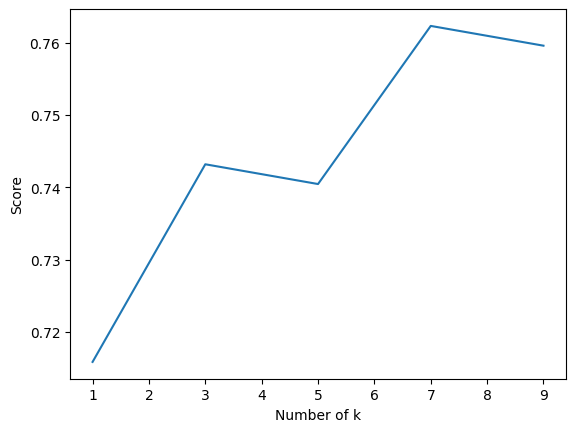

 
Accuracy of GNB: 84.153%
 
Accuracy of SVC with gamma=0.0: 43.443%
Accuracy of SVC with gamma=0.2: 78.962%
Accuracy of SVC with gamma=0.4: 77.596%
Accuracy of SVC with gamma=0.6: 76.503%
Accuracy of SVC with gamma=0.8: 74.317%
Accuracy of SVC with gamma=1.0: 74.044%


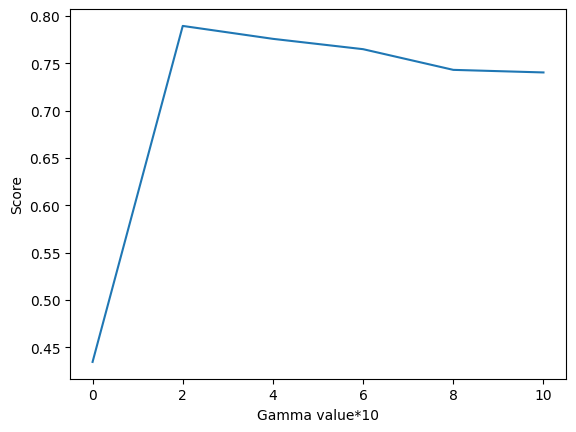

 
Accuracy of DTC with Max Depth=1: 84.43%
Accuracy of DTC with Max Depth=3: 85.52%
Accuracy of DTC with Max Depth=5: 82.79%
Accuracy of DTC with Max Depth=7: 83.06%
Accuracy of DTC with Max Depth=9: 80.05%


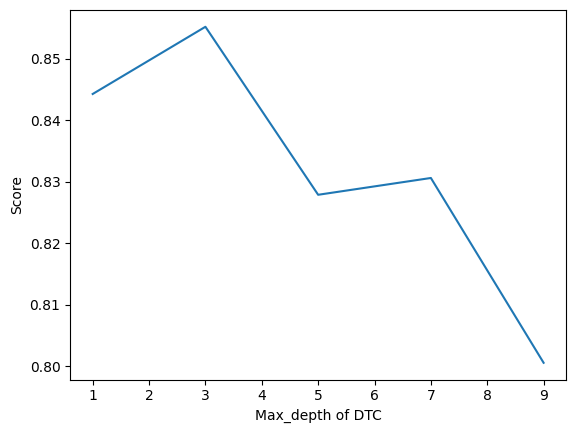

 
Accuracy of RFC with Max Depth=1: 84.43%
Accuracy of RFC with Max Depth=3: 85.79%
Accuracy of RFC with Max Depth=5: 85.52%
Accuracy of RFC with Max Depth=7: 85.52%
Accuracy of RFC with Max Depth=9: 84.70%


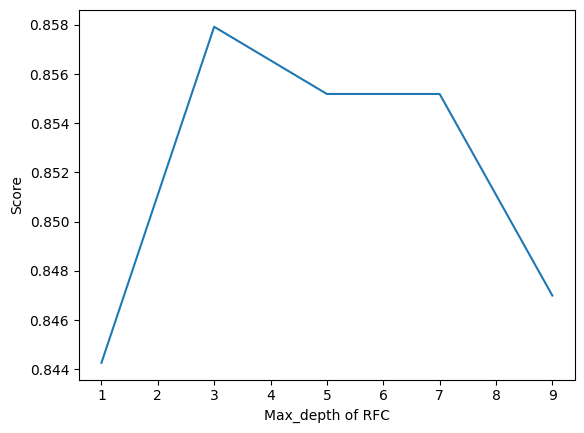

 
Accuracy of GBC with Max Depth=1: 84.97 %
Accuracy of GBC with Max Depth=3: 82.79 %
Accuracy of GBC with Max Depth=5: 82.24 %
Accuracy of GBC with Max Depth=7: 81.15 %
Accuracy of GBC with Max Depth=9: 81.15 %


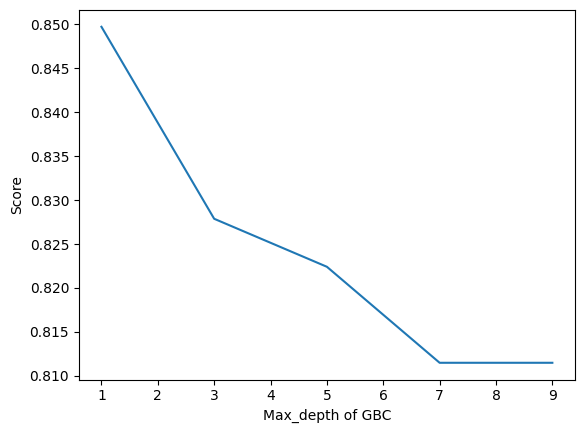

In [340]:
#check with
#Hyperparameter tuning for Lgr
lgr= LGR().fit(X_train, y_train)
print(f'R2 score of LGR: {lgr.score(X_test, y_test):.3%}')
print(" ")
models = {}
scores = []
scores1 = []
scores2 = []
scores3 = []
scores4 = []
#Hyperparameter tuning for KNN
for i in range(1,11,2):
  knn= KNN(n_neighbors=i).fit(X_train, y_train)
  #scores= cross_val_score(knn_scores, X, y, cv=kf, n_jobs=-1)
  score=knn.score(X_test,y_test)
  scores.append(score)
  print(f"Accuracy of KNN with neighbors={i}: {score:.3%}")
  y_pred = lgr.predict(X_test)

plt.plot(range(1, 11,2), scores)
plt.xlabel("Number of k")
plt.ylabel("Score")
plt.show()
print(" ")

#Hyperparameter tuning for GNB
gnb = GNB().fit(X_train, y_train)
print(f'Accuracy of GNB: {gnb.score(X_test, y_test):.3%}')
print(" ")

#Hyperparameter tuning for SVC
for i in range(0,11,2):
  svc = SVC(kernel='rbf', C=1, gamma=i/10).fit(X_train, y_train)
  score=svc.score(X_test,y_test)
  print(f"Accuracy of SVC with gamma={i/10}: {score:.3%}")
  scores1.append(score)

plt.plot(range(0, 11, 2), scores1)
plt.xlabel("Gamma value*10")
plt.ylabel("Score")
plt.show()
print(" ")

#Hyperparameter tuning for DTC
for i in range(1,11,2):
  dtc = DTC(max_depth=i,random_state=42).fit(X_train, y_train)
  score = dtc.score(X_test, y_test)
  print(f'Accuracy of DTC with Max Depth={i}: {score:.2%}')
  scores2.append(score)

plt.plot(range(1, 11, 2), scores2)
plt.xlabel("Max_depth of DTC")
plt.ylabel("Score")
plt.show()
print(" ")

#Hyperparameter tuning for RFC
for i in range(1,11,2):
  rfc = RFC(max_depth=i, random_state=42).fit(X_train, y_train)
  score = rfc.score(X_test, y_test)
  print(f'Accuracy of RFC with Max Depth={i}: {score:.2%}')
  scores3.append(score)

plt.plot(range(1, 11, 2), scores3)
plt.xlabel("Max_depth of RFC")
plt.ylabel("Score")
plt.show()
print(" ")

#Hyperparameter tuning for GBC
for i in range(1,11,2):
  gbc= GBC(max_depth=i, random_state=42).fit(X_train, y_train)
  score = gbc.score(X_test, y_test)
  print(f'Accuracy of GBC with Max Depth={i}: {100*score:.2f} %')
  scores4.append(score)

plt.plot(range(1, 11, 2), scores4)
plt.xlabel("Max_depth of GBC")
plt.ylabel("Score")
plt.show()
print(" ")


In [326]:
#after hyper parameter tuning
models_new = {}
models_new['lgr'] = LGR() #r2 score
models_new['knn'] = KNN(n_neighbors=7) #accuracy
models_new['dtc'] = DTC(max_depth=3,random_state=42) #accuracy
models_new['rfc'] = RFC(max_depth=3,random_state=42) #accuracy
models_new['gbc'] = GBC(max_depth=1,random_state=42) #accuracy
models_new['gnb'] = GNB()
models_new['svc'] = SVC(kernel='rbf', C=1, gamma=0.2)
kf = KFold(n_splits=3,shuffle=True,random_state=42)
for n in models_new:
  score=cross_val_score(models_new[n], Xs1, y_New, cv=kf, n_jobs=-1)
  print(f'{n}:{score.mean():.3%},  {score.std():.3%}')

lgr:81.082%,  1.191%
knn:75.876%,  1.691%
dtc:84.715%,  1.315%
rfc:85.195%,  0.440%
gbc:85.058%,  0.798%
gnb:80.671%,  0.787%
svc:78.684%,  0.254%


In [327]:
for n in models_new:
  kf = KFold(n_splits=5,shuffle=True,random_state=42)#change to k = 5 k fold cross validation
  score=cross_val_score(models_new[n], Xs1, y_New, cv=kf, n_jobs=-1)
  print(f'{n}:{score.mean():.3%},  {score.std():.3%}')

lgr:81.632%,  2.124%
knn:76.491%,  0.727%
dtc:85.264%,  1.579%
rfc:85.127%,  1.509%
gbc:85.194%,  2.262%
gnb:80.671%,  2.247%
svc:79.166%,  2.282%
